## Multi-Class Prediction of Cirrhosis Outcomes

Since to 2023-12-20

### 1. **library imports**

In [1]:
# !pip install autogluon.eda

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import autogluon.eda.auto as auto
from autogluon.tabular import TabularDataset, TabularPredictor

### **2. data download**

In [3]:
!kaggle competitions download -c playground-series-s3e26
!unzip playground-series-s3e26 -d data

df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

!rm -rf data
!rm playground-series-s3e26.zip

100%|████████████████████████████████████████| 350k/350k [00:00<00:00, 1.49MB/s]
100%|████████████████████████████████████████| 350k/350k [00:00<00:00, 1.49MB/s]
Archive:  playground-series-s3e26.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


### **3. EDA**

`-` First, let's check DataFrames.

The more information of data, please check this hyperlink; [Cirrhosis Patient Survival Prediction](https://www.kaggle.com/datasets/joebeachcapital/cirrhosis-patient-survival-prediction)

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5271 entries, 0 to 5270
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             5271 non-null   int64  
 1   N_Days         5271 non-null   int64  
 2   Drug           5271 non-null   object 
 3   Age            5271 non-null   int64  
 4   Sex            5271 non-null   object 
 5   Ascites        5271 non-null   object 
 6   Hepatomegaly   5271 non-null   object 
 7   Spiders        5271 non-null   object 
 8   Edema          5271 non-null   object 
 9   Bilirubin      5271 non-null   float64
 10  Cholesterol    5271 non-null   float64
 11  Albumin        5271 non-null   float64
 12  Copper         5271 non-null   float64
 13  Alk_Phos       5271 non-null   float64
 14  SGOT           5271 non-null   float64
 15  Tryglicerides  5271 non-null   float64
 16  Platelets      5271 non-null   float64
 17  Prothrombin    5271 non-null   float64
 18  Stage   

In [6]:
set(df_train.columns) - set(df_test.columns)

{'Status'}

> No missing, and responsible value is a `Status`

In [7]:
df_train.Status.unique()  ## Three values in this column.

array(['D', 'C', 'CL'], dtype=object)

In [8]:
submission

,id,Status_C,Status_CL,Status_D
0,7905,0.628084,0.034788,0.337128
1,7906,0.628084,0.034788,0.337128
2,7907,0.628084,0.034788,0.337128
3,7908,0.628084,0.034788,0.337128
4,7909,0.628084,0.034788,0.337128
...,...,...,...,...
5266,13171,0.628084,0.034788,0.337128
5267,13172,0.628084,0.034788,0.337128
5268,13173,0.628084,0.034788,0.337128
5269,13174,0.628084,0.034788,0.337128


> And submission wanna probabilities for each status.

`-` `quick_fit`

Then, we're starting to EDA with `autogluon.eda`

## Target variable analysis

### Label Insights

 - Moderate minority class imbalance detected - imbalance ratio is `5.54%`. Recommendations:
   - downsample majority class `C` to improve the balance
   - upweight downsampled class so that `sample_weight = original_weight x downsampling_factor`.[TabularPredictor](https://auto.gluon.ai/stable/api/autogluon.predictor.html#module-0) supports this via `sample_weight` parameter

,count,unique,top,freq,dtypes,missing_count,missing_ratio,raw_type,special_types
Status,7905,3,C,4965,object,,,object,


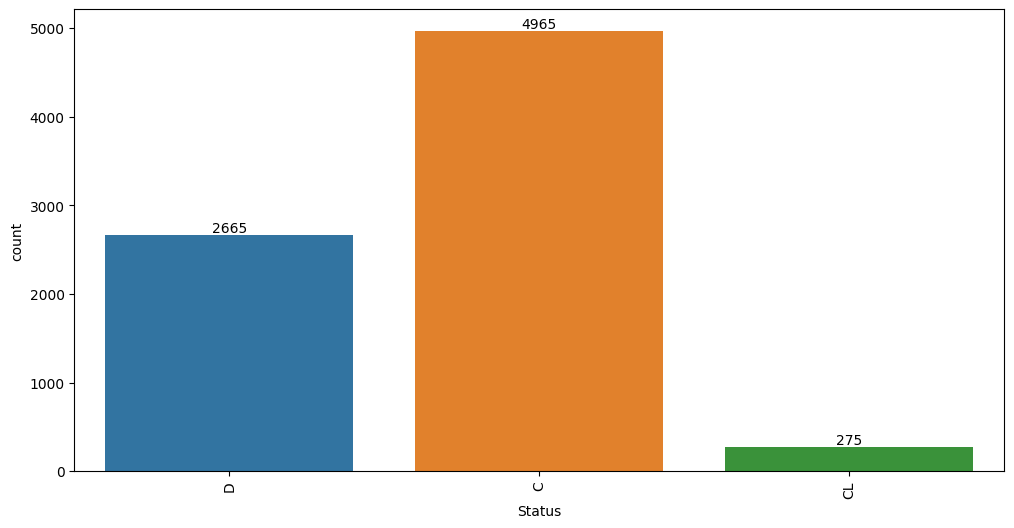

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `Status` >= `0.5`**

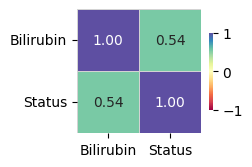

**Feature interaction between `Bilirubin`/`Status` in `train_data`**

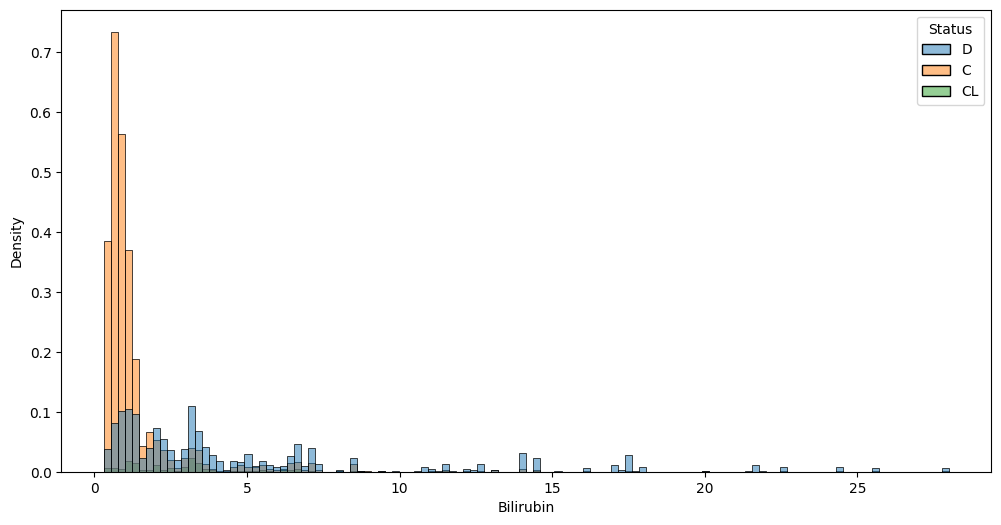

In [9]:
auto.target_analysis(
    train_data = df_train,
    label = 'Status',
    test_data = df_test,
    problem_type = 'multiclass'
)

No path specified. Models will be saved in: "AutogluonModels/ag-20231220_101726/"


### Model Prediction for Status

Using validation data for `Test` points

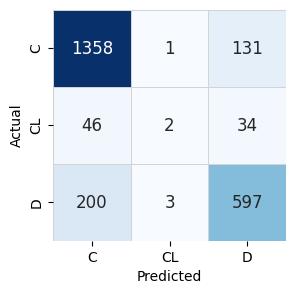

### Model Leaderboard

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,LightGBMXT,0.825042,0.833935,0.004941,0.00331,7.91203,0.004941,0.00331,7.91203,1,True,1


### Feature Importance for Trained Model

,importance,stddev,p_value,n,p99_high,p99_low
Bilirubin,0.029005,0.002881,0.000012,5,0.034937,0.023073
N_Days,0.019646,0.002162,0.000017,5,0.024098,0.015194
Prothrombin,0.013069,0.004422,0.001358,5,0.022173,0.003965
Copper,0.008685,0.002609,0.000870,5,0.014057,0.003313
Age,0.005818,0.002052,0.001586,5,0.010044,0.001592
Hepatomegaly,0.005481,0.001955,0.001652,5,0.009506,0.001456
Platelets,0.004384,0.001508,0.001445,5,0.007490,0.001279
Cholesterol,0.002614,0.002656,0.046311,5,0.008083,-0.002856
Edema,0.002445,0.001670,0.015349,5,0.005885,-0.000994
SGOT,0.001855,0.002626,0.094684,5,0.007262,-0.003552


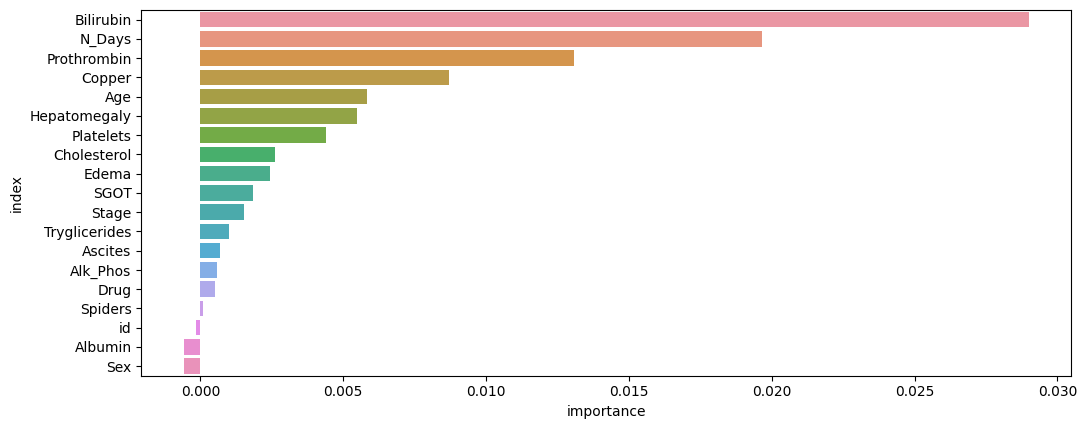

### Rows with the highest prediction error

Rows in this category worth inspecting for the causes of the error

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,C,CL,D,error
430,430,1012,D-penicillamine,18731,F,N,Y,Y,S,8.0,...,288.00,133.0,238.0,12.0,4.0,CL,0.027901,0.005521,0.966578,0.961057
4935,4935,2475,Placebo,17884,F,Y,Y,Y,Y,3.2,...,102.30,62.0,248.0,11.5,4.0,CL,0.029484,0.010874,0.959642,0.948768
677,677,3388,Placebo,15548,F,N,N,N,N,0.8,...,97.65,114.0,265.0,10.0,4.0,CL,0.944454,0.007141,0.048405,0.937312
4203,4203,2241,Placebo,14705,F,N,N,N,N,0.5,...,54.25,145.0,265.0,11.0,1.0,CL,0.947356,0.018498,0.034146,0.928859
6426,6426,533,D-penicillamine,20232,F,N,Y,Y,Y,1.6,...,134.85,92.0,172.0,11.2,2.0,C,0.033946,0.004015,0.962039,0.928093
4531,4531,1525,D-penicillamine,14025,F,N,N,N,N,0.4,...,58.00,85.0,153.0,9.8,3.0,D,0.958991,0.009851,0.031158,0.927833
1791,1791,1237,Placebo,17884,F,N,N,N,N,1.0,...,72.85,224.0,344.0,9.7,2.0,CL,0.936153,0.013925,0.049922,0.922227
1004,1004,2216,Placebo,19295,F,Y,Y,N,Y,12.7,...,51.15,99.0,200.0,11.0,4.0,C,0.034836,0.008199,0.956965,0.922129
5669,5669,1536,Placebo,14161,F,N,N,N,N,0.7,...,88.35,130.0,445.0,9.6,3.0,D,0.946618,0.027860,0.025523,0.921095
2971,2971,2170,D-penicillamine,17512,F,N,N,N,N,1.0,...,83.70,114.0,438.0,9.8,3.0,D,0.952360,0.011572,0.036067,0.916293


### Rows with the least distance vs other class

Rows in this category are the closest to the decision boundary vs the other class and are good candidates for additional labeling

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,...,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,C,CL,D,error
676,676,1783,D-penicillamine,17525,F,N,Y,Y,N,1.3,...,153.45,133.0,195.0,10.6,4.0,C,0.491289,0.017155,0.491555,0.000266
3668,3668,1882,Placebo,19246,M,N,Y,N,N,1.4,...,71.00,91.0,228.0,11.0,4.0,D,0.486783,0.027889,0.485328,0.001455
5912,5912,877,D-penicillamine,12979,F,N,Y,N,N,2.4,...,137.95,87.0,306.0,10.6,4.0,D,0.218636,0.392385,0.388980,0.003405
1546,1546,3297,D-penicillamine,22574,F,N,Y,N,N,2.3,...,110.05,52.0,240.0,11.0,3.0,D,0.497049,0.010963,0.491988,0.005061
822,822,1979,D-penicillamine,23235,M,N,Y,Y,N,0.8,...,133.30,93.0,339.0,11.0,4.0,C,0.491311,0.012139,0.496550,0.005239
3998,3998,3762,Placebo,19619,F,N,Y,Y,N,1.4,...,79.05,79.0,251.0,12.0,4.0,D,0.497469,0.010352,0.492179,0.005290
3934,3934,2556,Placebo,18719,F,N,Y,Y,N,1.8,...,196.85,106.0,79.0,10.3,4.0,C,0.486500,0.019139,0.494361,0.007861
5344,5344,552,Placebo,19318,F,N,Y,N,N,0.3,...,120.90,151.0,153.0,10.0,4.0,C,0.483127,0.024603,0.492269,0.009142
1746,1746,733,D-penicillamine,14939,F,N,N,N,N,2.0,...,130.20,210.0,539.0,10.6,3.0,CL,0.221139,0.380290,0.398572,0.018282
3546,3546,797,Placebo,16718,F,N,Y,Y,N,1.1,...,122.45,104.0,234.0,10.2,4.0,C,0.456253,0.067363,0.476385,0.020132


In [10]:
auto.quick_fit(
    train_data = df_train,
    label = 'Status',
    test_data = df_test,
    problem_type = 'multiclass',
    show_feature_importance_barplots = True
)

### **3. Just, Fitting**

In [11]:
predictr = TabularPredictor(label = 'Status', problem_type = 'multiclass')

predictr.fit(df_train)

No path specified. Models will be saved in: "AutogluonModels/ag-20231220_101735/"
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20231220_101735/"
AutoGluon Version:  0.8.2
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #140-Ubuntu SMP Thu Aug 4 02:23:37 UTC 2022
Disk Space Avail:   915.20 GB / 1887.51 GB (48.5%)
Train Data Rows:    7905
Train Data Columns: 19
Label Column: Status
Preprocessing data ...
Train Data Class Count: 3
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    312934.53 MB
	Train Data (Original)  Memory Usage: 3.65 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 5 features to boolean dtype as they only cont

In [24]:
predictr.predict_proba(df_test)

,C,CL,D
0,0.625449,0.017373,0.357179
1,0.623996,0.196170,0.179834
2,0.034050,0.012318,0.953632
3,0.931478,0.004079,0.064443
4,0.722859,0.043947,0.233194
...,...,...,...
5266,0.889383,0.038159,0.072458
5267,0.960626,0.004338,0.035036
5268,0.870789,0.010937,0.118274
5269,0.986179,0.008092,0.005729


In [13]:
predictr.leaderboard(silent = True)

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.847029,0.104441,49.211257,0.000559,0.510405,2,True,14
1,CatBoost,0.840708,0.004997,7.423681,0.004997,7.423681,1,True,8
2,LightGBM,0.838180,0.003954,9.672503,0.003954,9.672503,1,True,5
3,LightGBMLarge,0.836915,0.007135,37.176247,0.007135,37.176247,1,True,13
4,LightGBMXT,0.836915,0.017132,18.529821,0.017132,18.529821,1,True,4
5,XGBoost,0.834387,0.007821,2.136496,0.007821,2.136496,1,True,11
6,RandomForestEntr,0.833123,0.075175,0.585705,0.075175,0.585705,1,True,7
7,NeuralNetTorch,0.830594,0.019756,31.018964,0.019756,31.018964,1,True,12
8,RandomForestGini,0.830594,0.071952,0.613168,0.071952,0.613168,1,True,6
9,NeuralNetFastAI,0.829330,0.015822,13.624664,0.015822,13.624664,1,True,3


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.9,90.0,430.0,10.6,2.0


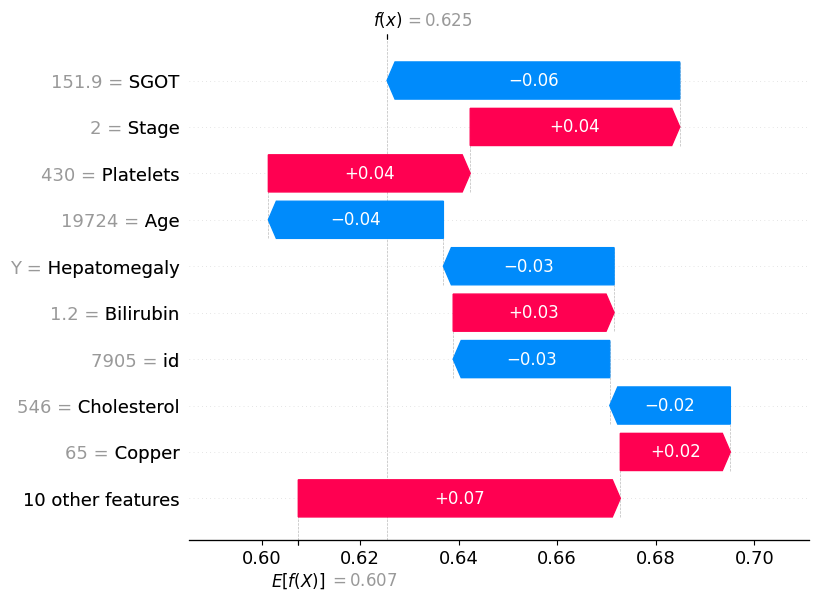

In [22]:
auto.explain_rows(
    train_data = df_train,
    model = predictr,
    rows = df_test.loc[[0]],
    display_rows = True,
    plot = 'waterfall'
)

* submission

In [75]:
def fitting(df_train_featured, df_test_featured) :
    """
    피쳐엔지니어링 된 데이터프레임을 넣으면 결과값을 반환하는 함수, 변수 hp를 수정하여 하이퍼파라메터 조정이 가능
    """
    predictr = TabularPredictor(label = 'Status', problem_type = 'multiclass')

    hp = {
        'NN_TORCH': {},
        'GBM': [
            {'extra_trees': True, 'ag_args': {'name_suffix': 'XT'}},
            {},
            'GBMLarge',
        ],
        'CAT': {},
        'XGB': {},
        'FASTAI': {},
        'RF': [
            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
            {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
        ],
        'XT': [
            {'criterion': 'gini', 'ag_args': {'name_suffix': 'Gini', 'problem_types': ['binary', 'multiclass']}},
            {'criterion': 'entropy', 'ag_args': {'name_suffix': 'Entr', 'problem_types': ['binary', 'multiclass']}},
            {'criterion': 'squared_error', 'ag_args': {'name_suffix': 'MSE', 'problem_types': ['regression']}},
        ],
        'KNN': [
            {'weights': 'uniform', 'ag_args': {'name_suffix': 'Unif'}},
            {'weights': 'distance', 'ag_args': {'name_suffix': 'Dist'}},
        ],
    }
    
    predictr.fit(df_train_featured, verbosity = False, hyperparameters = hp)

    yhat = predictr.predict(df_train)
    yyhat = predictr.predict(df_test)

    yyhat_proba = predictr.predict_proba(df_test)

    plotting(df_train_featured, yhat, yyhat)
    
    return yyhat_proba

In [122]:
def plotting(df_train_featured, yhat, yyhat) :
    df_yhat = pd.get_dummies(yhat).sum(axis = 0).to_frame().reset_index().assign(type = 'yhat').rename({'index' : 'Status', 0 : 'count'}, axis = 1)
    df_yyhat = pd.get_dummies(yyhat).sum(axis = 0).to_frame().reset_index().assign(type = 'yyhat').rename({'index' : 'Status', 0 : 'count'}, axis = 1)
    df_train = pd.get_dummies(df_train_featured['Status']).sum(axis = 0).to_frame().reset_index().assign(type = 'train').rename({'index' : 'Status', 0 : 'count'}, axis = 1)

    fig = pd.concat([df_train, df_yhat, df_yyhat], axis = 0).plot.bar(x = 'Status', y = 'count', facet_col = 'type', backend = 'plotly', color = 'Status')
    fig.update_yaxes(matches=None,showticklabels=True)
    
    return fig.show()

In [37]:
def submit(yyhat) :
    pd.concat([submission[['id']], yyhat], axis = 1).set_axis(['id', 'Status_C', 'Status_CL', 'Status_D'], axis = 1).to_csv('submission.csv', index = False)
    !kaggle competitions submit -c playground-series-s3e26 -f submission.csv -m "Message"
    !rm submission.csv

In [38]:
submit(predictr.predict_proba(df_test))

100%|█████████████████████████████████████████| 202k/202k [00:02<00:00, 101kB/s]
Successfully submitted to Multi-Class Prediction of Cirrhosis Outcomes

In [102]:
pd.get_dummies(predictr.predict(df_test)).sum(axis = 0).to_frame()

,0
C,3478
CL,14
D,1779


In [32]:
submission = pd.concat([submission[['id']], predictr.predict_proba(df_test)], axis = 1).set_axis(['id', 'Status_C', 'Status_CL', 'Status_D'], axis = 1)
submission

,id,Status_C,Status_CL,Status_D
0,7905,0.625449,0.017373,0.357179
1,7906,0.623996,0.196170,0.179834
2,7907,0.034050,0.012318,0.953632
3,7908,0.931478,0.004079,0.064443
4,7909,0.722859,0.043947,0.233194
...,...,...,...,...
5266,13171,0.889383,0.038159,0.072458
5267,13172,0.960626,0.004338,0.035036
5268,13173,0.870789,0.010937,0.118274
5269,13174,0.986179,0.008092,0.005729


> scroe : 0.43337

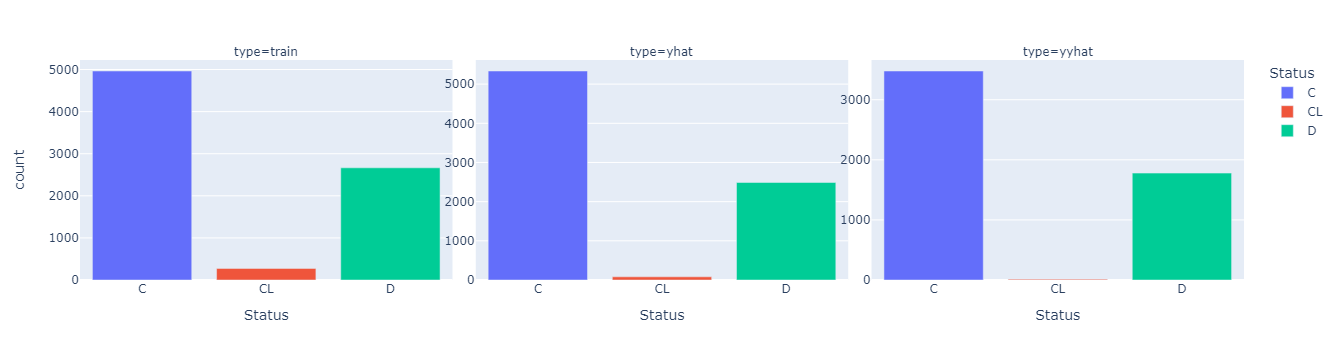

In [123]:
plotting(df_train, predictr.predict(df_train), predictr.predict(df_test))

> 나름 잘 한 것 같다만, CL의 비중이 너무 작은 게 아쉽다.

### **4. Feature engineering**

* drop id columns

In [149]:
df_train[df_train.columns].nunique().sort_values(ascending=True)

Drug                2
Sex                 2
Ascites             2
Hepatomegaly        2
Spiders             2
Status              3
Edema               3
Stage               4
Prothrombin        49
Bilirubin         111
Tryglicerides     154
Albumin           160
Copper            171
SGOT              206
Cholesterol       226
Platelets         227
Alk_Phos          364
Age               391
N_Days            461
id               7905
dtype: int64

> `Stage`열을 유심히 보면 좋을 듯 함

In [124]:
df_train_featured = df_train.copy()
df_test_featured = df_test.copy()

df_train_featured = df_train.drop('id', axis = 1)
df_test_featured = df_test.drop('id', axis = 1)

In [127]:
set(df_train_featured['Drug'])

{'D-penicillamine', 'Placebo'}

In [158]:
pd.get_dummies(df_train_featured['Status'])

,C,CL,D
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0
...,...,...,...
7900,1,0,0
7901,1,0,0
7902,0,0,1
7903,0,0,1


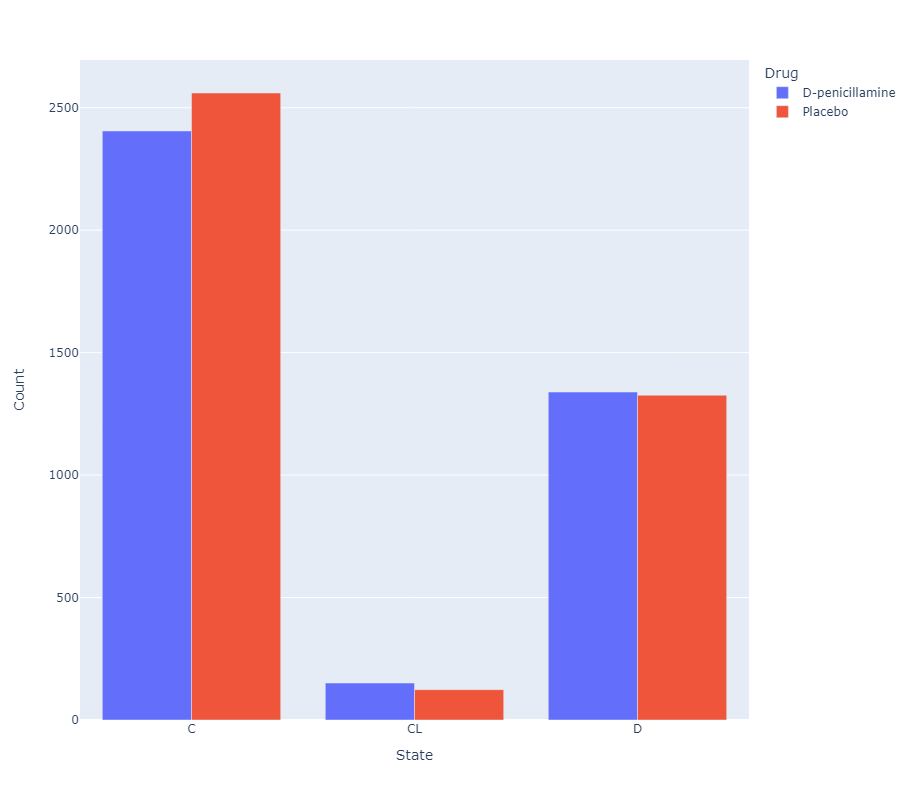

In [167]:
fig = pd.concat([df_train_featured[['Drug']], pd.get_dummies(df_train_featured['Status'])], axis = 1).pivot_table(index = 'Drug', values = ['C', 'CL', 'D'], aggfunc = 'sum')\
.stack().reset_index().set_axis(['Drug', 'State', 'Count'], axis = 1).plot.bar(x = 'State', y = 'Count', backend = 'plotly', color = 'Drug', height = 800, width = 800)

fig.update_layout(barmode='group')
fig.show()

> `C`가 상대적으로 더 많고, 나머지는 더 적음. 유효한 변수라고 판단됨(그대로 두자)

In [168]:
def compare(column) :
    fig = pd.concat([df_train_featured[[column]], pd.get_dummies(df_train_featured['Status'])], axis = 1).pivot_table(index = column, values = ['C', 'CL', 'D'], aggfunc = 'sum')\
.stack().reset_index().set_axis([column, 'State', 'Count'], axis = 1).plot.bar(x = 'State', y = 'Count', backend = 'plotly', color = column, height = 800, width = 800)

    fig.update_layout(barmode='group')
    fig.show()

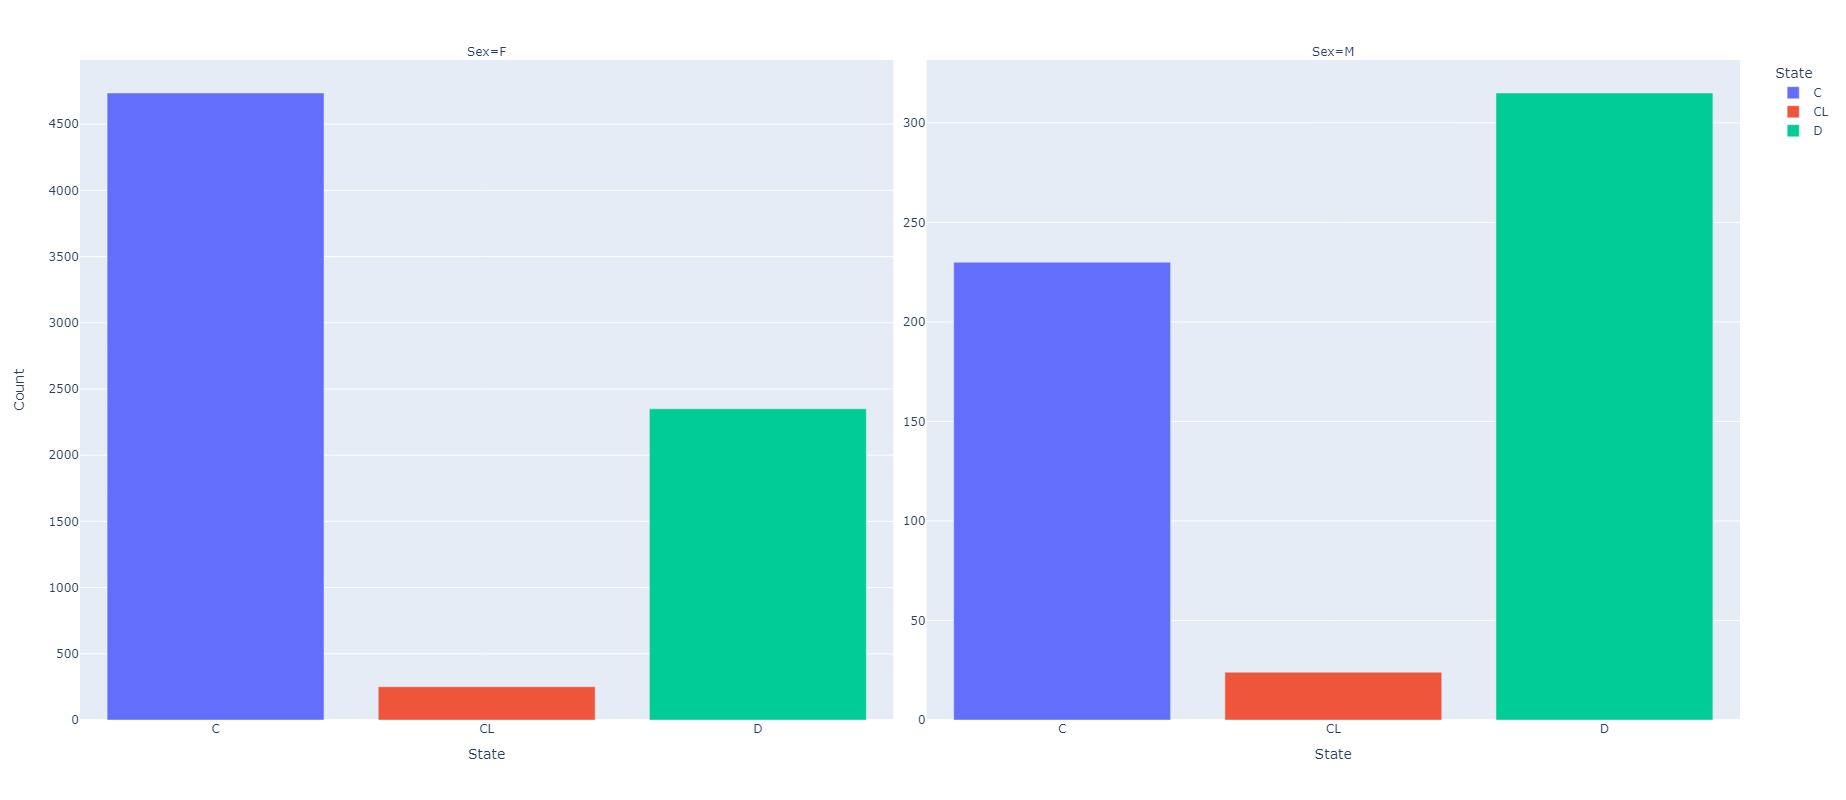

In [181]:
column = 'Sex'

fig = pd.concat([df_train_featured[[column]], pd.get_dummies(df_train_featured['Status'])], axis = 1).pivot_table(index = column, values = ['C', 'CL', 'D'], aggfunc = 'sum')\
.stack().reset_index().set_axis([column, 'State', 'Count'], axis = 1).plot.bar(x = 'State', y = 'Count', backend = 'plotly', color = 'State', facet_col = column, height = 800, width = 800)

fig.update_yaxes(matches=None,showticklabels=True)

> 성별도 유의미함

In [183]:
def facet_compare(column) :
    fig = pd.concat([df_train_featured[[column]], pd.get_dummies(df_train_featured['Status'])], axis = 1).pivot_table(index = column, values = ['C', 'CL', 'D'], aggfunc = 'sum')\
.stack().reset_index().set_axis([column, 'State', 'Count'], axis = 1).plot.bar(x = 'State', y = 'Count', backend = 'plotly', color = 'State', facet_col = column, height = 800, width = 800)

    fig.update_yaxes(matches=None,showticklabels=True)
    return fig.show()

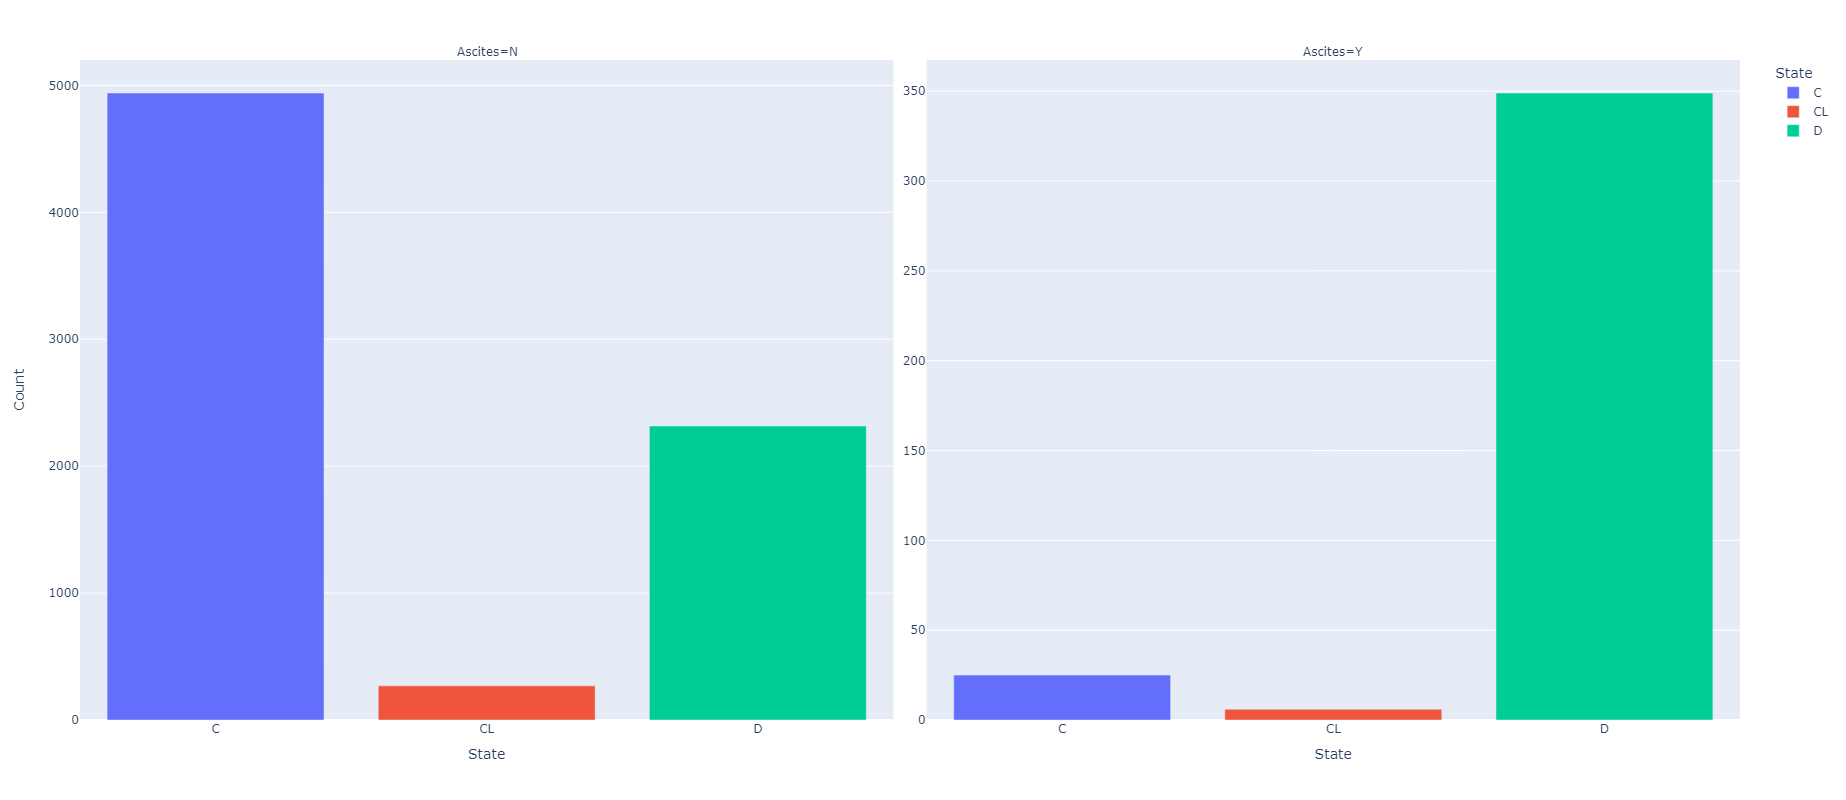

In [185]:
facet_compare('Ascites')

> 뭔지 모를 것도 유의미

In [188]:
df_train_featured.select_dtypes(include = 'O')

,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Status
0,D-penicillamine,M,N,N,N,N,D
1,Placebo,F,N,N,N,N,C
2,Placebo,F,N,Y,Y,Y,D
3,Placebo,F,N,N,N,N,C
4,Placebo,F,N,Y,N,N,C
...,...,...,...,...,...,...,...
7900,D-penicillamine,F,N,N,N,N,C
7901,Placebo,F,N,Y,N,N,C
7902,D-penicillamine,F,N,N,Y,S,D
7903,D-penicillamine,M,N,Y,N,N,D


In [202]:
df_train_featured.columns[df_train_featured.nunique() == 2].to_list()

['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']

In [207]:
pd.get_dummies(df_train_featured.loc[:, df_train_featured.nunique() == 2], drop_first = True)

,Drug_Placebo,Sex_M,Ascites_Y,Hepatomegaly_Y,Spiders_Y
0,0,1,0,0,0
1,1,0,0,0,0
2,1,0,0,1,1
3,1,0,0,0,0
4,1,0,0,1,0
...,...,...,...,...,...
7900,0,0,0,0,0
7901,1,0,0,1,0
7902,0,0,0,0,1
7903,0,1,0,1,0


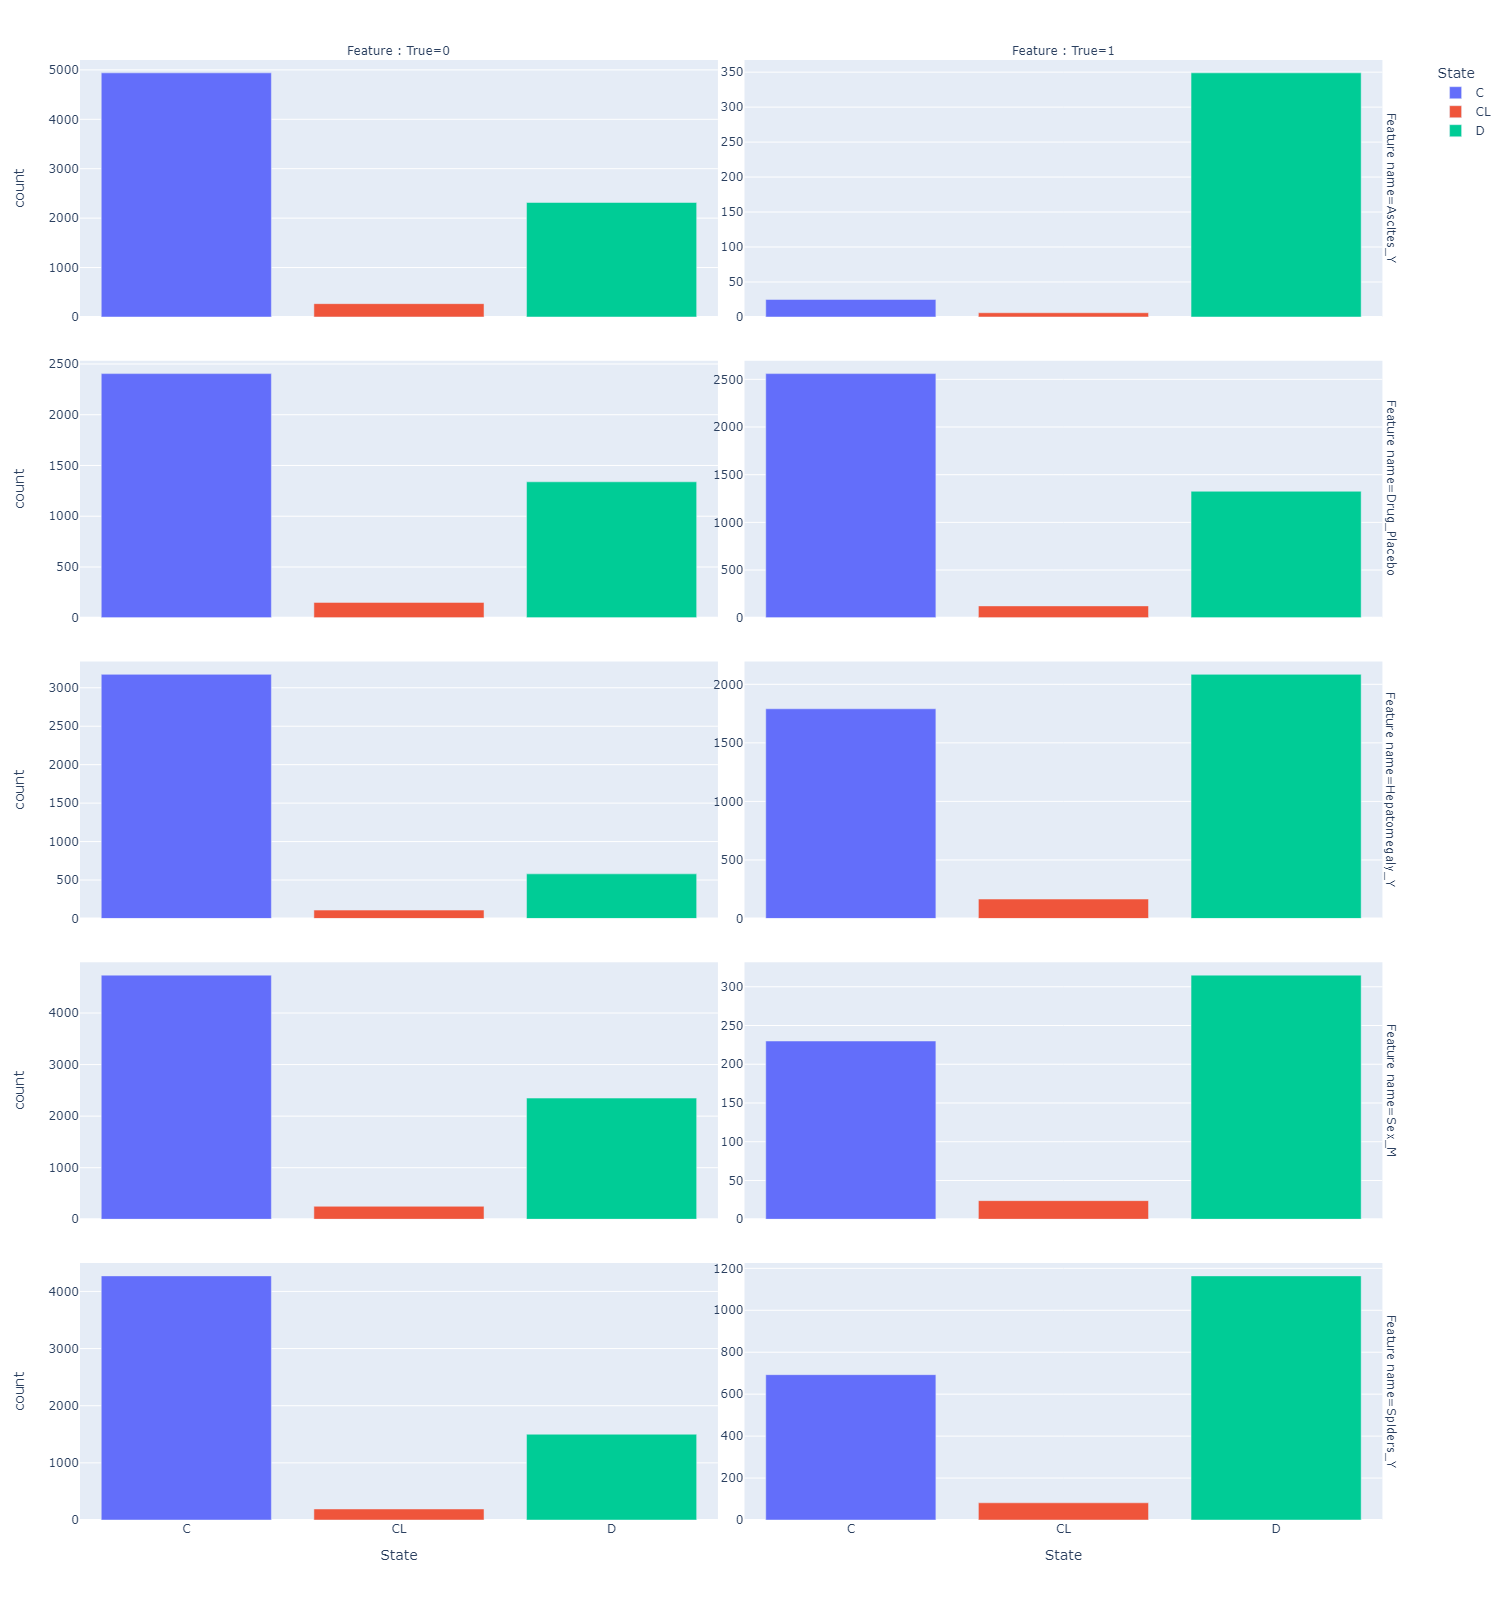

In [244]:
fig = pd.concat([pd.get_dummies(df_train_featured.loc[:, df_train_featured.nunique() == 2], drop_first = True), pd.get_dummies(df_train_featured['Status'])], axis = 1)\
.pivot_table(index = pd.get_dummies(df_train_featured.loc[:, df_train_featured.nunique() == 2], drop_first = True).columns.to_list(), values = ['C', 'CL', 'D'], aggfunc = 'sum').reset_index()\
.set_index(['C', 'CL', 'D']).stack().reset_index().rename({'level_3' : 'Feature name', 0 : 'Feature : True'}, axis = 1).set_index(['Feature : True', 'Feature name']).stack().reset_index().rename({'level_2' : 'State', 0 : 'count'}, axis = 1)\
.pivot_table(index = ['Feature name', 'State', 'Feature : True'], values = 'count', aggfunc = 'sum').reset_index()\
.plot.bar(x = 'State', y = 'count', backend = 'plotly', facet_col = 'Feature : True', facet_row = 'Feature name', height = 1600, color = 'State')

fig.update_yaxes(matches=None,showticklabels=True)
fig.show()

> 성별 집단의 바플롯과 거미혈관종 집단의 바플롯 개형이 유사한데, 거미혈관종은 유의미할 것으로 보임. 따라서 둘 중 하나를 제거해야 한다면 성별을 제거해주는 게 좋을까...? 이게 뭔 상관이지